Dataset Link or you follow my steps to import dataset in colab from kaggle directly

# https://www.kaggle.com/paultimothymooney/chest-xray-pneumonia

In [0]:
from google.colab import files
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"usmanihsan7700","key":"bc0833fca8780d587bfcb9f7143d0282"}'}

In [0]:
!pip install kaggle


In [0]:
!mkdir .kaggle


In [0]:
import json
token = {"username":"usmanihsan7700","key":"bc0833fca8780d587bfcb9f7143d0282"}
with open('/content/.kaggle/kaggle.json', 'w') as file:
    json.dump(token, file)

In [0]:
!chmod 600 /content/.kaggle/kaggle.json


In [0]:
!cp /content/.kaggle/kaggle.json ~/.kaggle/kaggle.json


In [0]:
!cp /content/.kaggle/kaggle.json ~/root/.kaggle/kaggle.json


cp: cannot create regular file '/root/root/.kaggle/kaggle.json': No such file or directory


In [0]:
!kaggle config set -n path -v{/content}


- path is now set to: {/content}


In [0]:
#!kaggle datasets download -d zalando-research/fashionmnist -p /content
!kaggle datasets download -d paultimothymooney/chest-xray-pneumonia -p /content


100% 2.28G/2.29G [00:24<00:00, 91.7MB/s]
100% 2.29G/2.29G [00:24<00:00, 99.6MB/s]


In [0]:
!unzip \*.zip


Archive:  chest-xray-pneumonia.zip
  inflating: chest_xray/__MACOSX/._chest_xray  
  inflating: chest_xray/__MACOSX/chest_xray/._.DS_Store  
  inflating: chest_xray/__MACOSX/chest_xray/._test  
  inflating: chest_xray/__MACOSX/chest_xray/._train  
  inflating: chest_xray/__MACOSX/chest_xray/test/._.DS_Store  
  inflating: chest_xray/__MACOSX/chest_xray/test/._NORMAL  
  inflating: chest_xray/__MACOSX/chest_xray/test/._PNEUMONIA  
  inflating: chest_xray/__MACOSX/chest_xray/test/NORMAL/._IM-0001-0001.jpeg  
  inflating: chest_xray/__MACOSX/chest_xray/test/NORMAL/._IM-0003-0001.jpeg  
  inflating: chest_xray/__MACOSX/chest_xray/test/NORMAL/._IM-0005-0001.jpeg  
  inflating: chest_xray/__MACOSX/chest_xray/test/NORMAL/._IM-0006-0001.jpeg  
  inflating: chest_xray/__MACOSX/chest_xray/test/NORMAL/._IM-0007-0001.jpeg  
  inflating: chest_xray/__MACOSX/chest_xray/test/NORMAL/._IM-0009-0001.jpeg  
  inflating: chest_xray/__MACOSX/chest_xray/test/NORMAL/._IM-0010-0001.jpeg  
  inflating: chest_x

In [0]:
import numpy as np # forlinear algebra
import matplotlib.pyplot as plt #for plotting things
import os
from PIL import Image
print(os.listdir("/content/chest_xray"))

# Keras Libraries
import keras
from keras.models import Sequential
from keras.layers import Conv2D
from keras.layers import MaxPooling2D
from keras.layers import Flatten
from keras.layers import Dense
from keras.preprocessing.image import ImageDataGenerator, load_img

['val', 'test', 'chest_xray', 'train', '__MACOSX']


Using TensorFlow backend.


In [0]:
mainDIR = os.listdir('/content/chest_xray/chest_xray')
print(mainDIR)

['val', 'test', 'train', '.DS_Store']


In [0]:
train_folder= 'chest_xray/chest_xray/train/'
val_folder = 'chest_xray/chest_xray/val/'
test_folder = 'chest_xray/chest_xray/test/'

In [0]:
os.listdir(train_folder)
train_n = train_folder+'NORMAL/'
train_p = train_folder+'PNEUMONIA/'

In [0]:
train_n

'chest_xray/chest_xray/train/NORMAL/'

1342
normal picture title:  IM-0371-0001.jpeg
pneumonia picture title: person506_bacteria_2138.jpeg


Text(0.5, 1.0, 'Pneumonia')

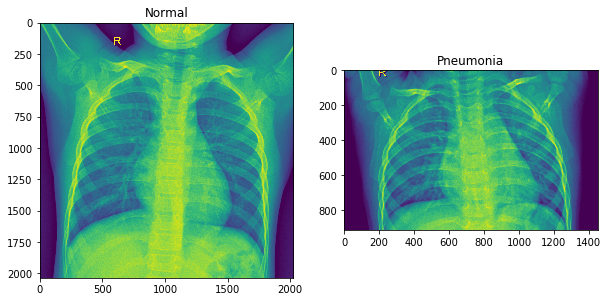

In [0]:
#Normal pic 
print(len(os.listdir(train_n)))
rand_norm= np.random.randint(0,len(os.listdir(train_n)))
norm_pic = os.listdir(train_n)[rand_norm]
print('normal picture title: ',norm_pic)

norm_pic_address = train_n+norm_pic

#Pneumonia
rand_p = np.random.randint(0,len(os.listdir(train_p)))

sic_pic =  os.listdir(train_p)[rand_norm]
sic_address = train_p+sic_pic
print('pneumonia picture title:', sic_pic)

# Load the images
norm_load = Image.open(norm_pic_address)
sic_load = Image.open(sic_address)

#Let's plt these images
f = plt.figure(figsize= (10,6))
a1 = f.add_subplot(1,2,1)
img_plot = plt.imshow(norm_load)
a1.set_title('Normal')

a2 = f.add_subplot(1, 2, 2)
img_plot = plt.imshow(sic_load)
a2.set_title('Pneumonia')

Des't Use any Feature detection layer 

In [0]:
# let's build the CNN model

cnn = Sequential()

#Convolution
cnn.add(Conv2D(32, (3, 3), activation="relu", input_shape=(64, 64, 3)))


# 2nd Convolution
cnn.add(Conv2D(32, (3, 3), activation="relu"))


# Flatten the layer
cnn.add(Flatten())

# Fully Connected Layers
cnn.add(Dense(activation = 'relu', units = 128))
cnn.add(Dense(activation = 'sigmoid', units = 1))

# Compile the Neural network
cnn.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])






Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


In [0]:
# Fitting the CNN to the images
# The function ImageDataGenerator augments your image by iterating through image as your CNN is getting ready to process that image

train_datagen = ImageDataGenerator(rescale = 1./255,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True)

test_datagen = ImageDataGenerator(rescale = 1./255)  #Image normalization.

training_set = train_datagen.flow_from_directory('chest_xray/chest_xray/train',
                                                 target_size = (64, 64),
                                                 batch_size = 32,
                                                 class_mode = 'binary')

validation_generator = test_datagen.flow_from_directory('chest_xray/chest_xray/val/',
    target_size=(64, 64),
    batch_size=32,
    class_mode='binary')

test_set = test_datagen.flow_from_directory('chest_xray/chest_xray/test',
                                            target_size = (64, 64),
                                            batch_size = 32,
                                            class_mode = 'binary')

Found 5216 images belonging to 2 classes.
Found 16 images belonging to 2 classes.
Found 624 images belonging to 2 classes.


In [0]:
training_set[0]

(array([[[[0.11831523, 0.11831523, 0.11831523],
          [0.11833697, 0.11833697, 0.11833697],
          [0.1183587 , 0.1183587 , 0.1183587 ],
          ...,
          [0.0873377 , 0.0873377 , 0.0873377 ],
          [0.08739202, 0.08739202, 0.08739202],
          [0.08744636, 0.08744636, 0.08744636]],
 
         [[0.12515077, 0.12515077, 0.12515077],
          [0.1251725 , 0.1251725 , 0.1251725 ],
          [0.12519424, 0.12519424, 0.12519424],
          ...,
          [0.10146764, 0.10146764, 0.10146764],
          [0.10145677, 0.10145677, 0.10145677],
          [0.10144591, 0.10144591, 0.10144591]],
 
         [[0.1319863 , 0.1319863 , 0.1319863 ],
          [0.13200805, 0.13200805, 0.13200805],
          [0.13202977, 0.13202977, 0.13202977],
          ...,
          [0.09804987, 0.09804987, 0.09804987],
          [0.09803944, 0.09803944, 0.09803944],
          [0.0980503 , 0.0980503 , 0.0980503 ]],
 
         ...,
 
         [[0.02745098, 0.02745098, 0.02745098],
          [0.02745

In [0]:
cnn_model = cnn.fit_generator(training_set,
                         steps_per_epoch = 163,
                         epochs = 10,
                         validation_data = validation_generator,
                         validation_steps = 624)




Epoch 1/10





163/163 [==============================] - 187s 1s/step - loss: 0.3812 - acc: 0.8449 - val_loss: 0.5189 - val_acc: 0.8125
Epoch 2/10
163/163 [==============================] - 180s 1s/step - loss: 0.2433 - acc: 0.9020 - val_loss: 0.3592 - val_acc: 0.8750
Epoch 3/10
163/163 [==============================] - 180s 1s/step - loss: 0.2147 - acc: 0.9126 - val_loss: 0.4957 - val_acc: 0.8125
Epoch 4/10
163/163 [==============================] - 180s 1s/step - loss: 0.2086 - acc: 0.9164 - val_loss: 0.4933 - val_acc: 0.7500
Epoch 5/10
163/163 [==============================] - 180s 1s/step - loss: 0.2100 - acc: 0.9187 - val_loss: 0.6146 - val_acc: 0.6250
Epoch 6/10
163/163 [==============================] - 180s 1s/step - loss: 0.1860 - acc: 0.9252 - val_loss: 0.6714 - val_acc: 0.7500
Epoch 7/10
163/163 [==============================] - 180s 1s/step - loss: 0.1800 - acc: 0.9335 - val_loss: 0.4090 - val_acc: 0.8750
Epoch 8/10
162/163 [============================>.] - ETA: 0s

In [0]:
test_accu = cnn.evaluate_generator(test_set,steps=624)


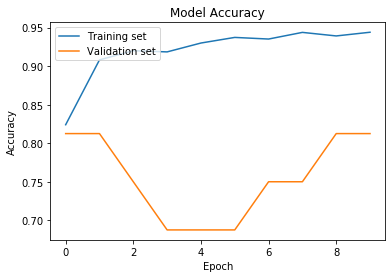

In [0]:
# Accuracy 
plt.plot(cnn_model.history['acc'])
plt.plot(cnn_model.history['val_acc'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Training set', 'Validation set'], loc='upper left')
plt.show()

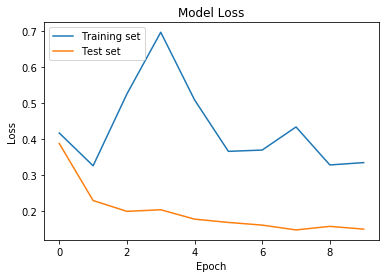

In [0]:
# Loss 

plt.plot(cnn_model.history['val_loss'])
plt.plot(cnn_model.history['loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Training set', 'Test set'], loc='upper left')
plt.show()